<a href="https://colab.research.google.com/github/anishdevadiga/Machine_Learning/blob/main/polynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Actual  Predicted
0        4        4.0
1        4        4.0
2        1        1.0
3        1        1.0
4        2        2.0
5        1        1.0
6        4        4.0
7        2        2.0
8        2        2.0
9        4        4.0
10       4        4.0
11       3        3.0
12       3        3.0
13       3        3.0
14       4        4.0
15       4        4.0
16       4        4.0
17       1        1.0
18       2        2.0
19       1        1.0
20       1        1.0
21       2        2.0
22       2        2.0
23       4        4.0
24       2        2.0
25       1        1.0
26       2        2.0
27       2        2.0
28       4        4.0
29       6        6.0
30       8        8.0
31       2        2.0

Polynomial Regression Equation:- y = -9.89 + (0.04) * x0 + (0.10) * x1 + (0.01) * x2 + (0.01) * x3 + (0.00) * x4 + (-0.04) * x5 + (0.02) * x6 + 

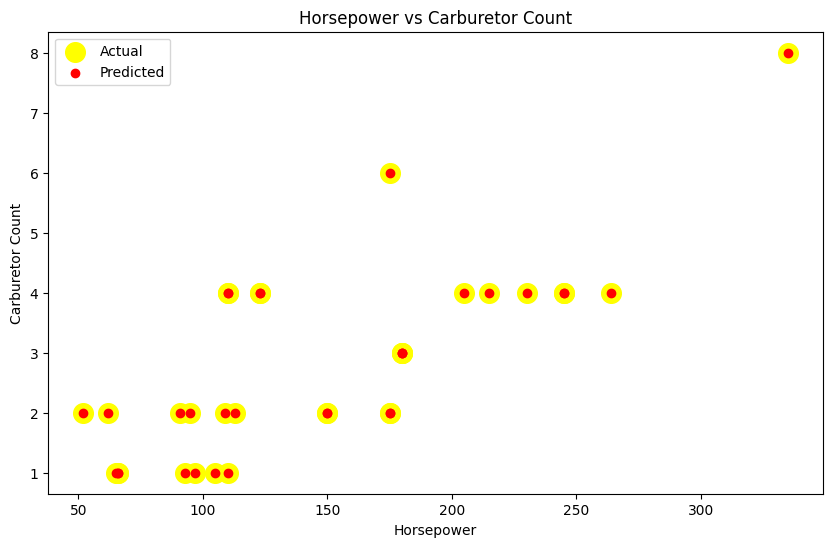

In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import mean_squared_error, r2_score
drive.mount('/content/drive')


mtcars = pd.read_csv('/content/drive/My Drive/mtcars.csv')
X_mtcars=mtcars[['cyl','disp','hp','drat','wt','qsec','vs','am','gear']].values
y_mtcars=mtcars['carb'].values

poly=PolynomialFeatures(degree=2)
X_mtcars_poly=poly.fit_transform(X_mtcars)

model=LinearRegression()
model.fit(X_mtcars_poly,y_mtcars)

y_pred_mtcars=model.predict(X_mtcars_poly)
resultantDataFrame=pd.DataFrame({'Actual':y_mtcars,'Predicted':y_pred_mtcars})
print(resultantDataFrame)

print()
feature_names=poly.get_feature_names_out()
coefficients=model.coef_

equation = "y = {:.2f}".format(model.intercept_)
for i in range(1, len(coefficients)):
    equation += " + ({:.2f}) * {}".format(coefficients[i], feature_names[i])
print("Polynomial Regression Equation:-",equation)
print()

mse = mean_squared_error(y_mtcars, y_pred_mtcars)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared (R²)
r2 = r2_score(y_mtcars, y_pred_mtcars)
print(f"R-squared (R²): {r2:.2f}")
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(mtcars['hp'], y_mtcars, color="yellow",s=200, label="Actual")
plt.scatter(mtcars['hp'], y_pred_mtcars, color="red", label="Predicted")
plt.xlabel('Horsepower')
plt.ylabel('Carburetor Count')
plt.title('Horsepower vs Carburetor Count')
plt.legend()
plt.show()


